In [ ]:
!pip install neo4j-graphrag openai

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = "sk-..."

In [ ]:
from neo4j_graphrag.generation.prompts import ERExtractionTemplate

prompt_template = ERExtractionTemplate()

prompt = prompt_template.format(
    schema = '내 스키마가 들어가는 곳',
    text = '내 추출 대상 텍스트가 들어가는 곳',
    examples = '내 예시가 들어가는 곳'
)
print(prompt)

In [ ]:
from neo4j_graphrag.llm import OpenAILLM

prompt_template = ERExtractionTemplate()
llm = OpenAILLM(model_name="gpt-4o", model_params={"temperature": 0})

input_text = '''
    철수와 영희는 친구입니다. 철수는 영희를 좋아합니다.
'''
prompt = prompt_template.format(
    schema = '',
    text = input_text,
    examples = ''
)

response = llm.invoke(prompt)
print(response.content)

In [ ]:
input_text = '''
    준호는 지민의 동료이자 하늘의 형입니다.
    지민은 최근에 하늘이 추천한 영화 "인셉션"과 "인터스텔라"를 보고 감동했다고 말했습니다.
    준호는 지민에게 하늘의 영화 취향에 대해 물어보았고, 지민은 하늘이 자주 보는 감독 크리스토퍼 놀란의 작품들을 나열해 주었습니다.
    이 대화 후, 준호는 지민에게 "인셉션"을 추천하며, 하늘이 좋아할 영화를 알아본다고 했습니다.
'''
prompt = prompt_template.format(
    schema = '',
    text = input_text,
    examples = ''
)

response = llm.invoke(prompt)
print(response.content)

In [ ]:
input_text = '''
    준호는 지민의 동료이자 하늘의 형입니다.
    지민은 최근에 하늘이 추천한 영화 "인셉션"과 "인터스텔라"를 보고 감동했다고 말했습니다.
    준호는 지민에게 하늘의 영화 취향에 대해 물어보았고, 지민은 하늘이 자주 보는 감독 크리스토퍼 놀란의 작품들을 나열해 주었습니다.
    이 대화 후, 준호는 지민에게 "인셉션"을 추천하며, 하늘이 좋아할 영화를 알아본다고 했습니다.
'''

input_schema = '''
Node properties:
Person {name: STRING, born: INTEGER}
Movie {tagline: STRING, title: STRING, released: INTEGER}
Relationship properties:
ACTED_IN {roles: LIST}
REVIEWED {summary: STRING, rating: INTEGER}
The relationships:
(:Person)-[:ACTED_IN]->(:Movie)
(:Person)-[:DIRECTED]->(:Movie)
(:Person)-[:PRODUCED]->(:Movie)
(:Person)-[:WROTE]->(:Movie)
(:Person)-[:FOLLOWS]->(:Person)
(:Person)-[:REVIEWED]->(:Movie)
'''

prompt = prompt_template.format(
    schema = input_schema,
    text = input_text,
    examples = ''
)

response = llm.invoke(prompt)
print(response.content)

https://sandbox.neo4j.com/

- Blank Sandbox 생성 및 드라이버 정보 연동

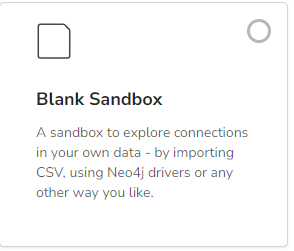

In [ ]:
import json
import neo4j
from neo4j_graphrag.experimental.components.kg_writer import Neo4jWriter
from neo4j_graphrag.experimental.components.types import Neo4jGraph

graph_json = json.loads(response.content)

with neo4j.GraphDatabase.driver("bolt://0.0.0.0", auth=("neo4j", "a-b-c")) as driver:
    writer = Neo4jWriter(driver)
    graph = Neo4jGraph(
        nodes= graph_json['nodes'],
        relationships= graph_json['relationships']
    )
    await writer.run(graph)